# Практика

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [15]:
# Сгенерируем выборку из распределения Бирнбаума-Сондерса 
# (Birnbaum-Saunders distribution/fatiguge life distribution)

triang_rv = sts.triang(1)
triang_sample = triang_rv.rvs(200)
triang_sample
triang_mean = triang_rv.mean()
triang_var = triang_rv.var()

print(triang_mean)
print(triang_var)

0.6666666666666666
0.05555555555555555


### Постройте гистограмму выборки и теоретическую плотность распределения

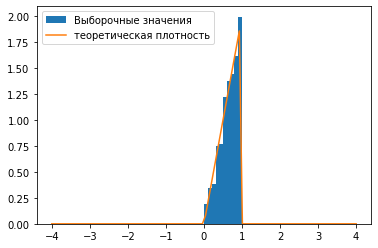

In [87]:
# ваш код тут
plt.hist(triang_sample, density=True, label = 'Выборочные значения')
x = np.linspace(-4,4,100)
pdf = triang_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=1)
plt.legend(loc = 'upper left')

### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

In [43]:
# ваш код тут

triang_rv = sts.triang(1)
# сгенерируем много выборочных средних
means_100 = []
means_1000 = []
means_10000 = []
for i in range(1000):
    means_100.append(np.mean(triang_rv.rvs(1000)))
    means_1000.append(np.mean(triang_rv.rvs(10000)))
    means_10000.append(np.mean(triang_rv.rvs(100000)))

[]

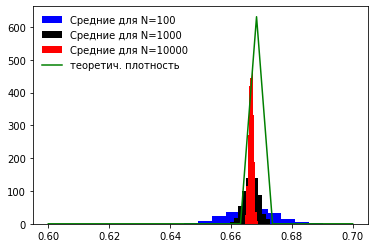

In [55]:
means_100 = np.array(means_100).astype(np.float32)
means_1000 = np.array(means_1000).astype(np.float32)
means_10000 = np.array(means_10000).astype(np.float32)
real_triang_rv = sts.triang(1, loc=triang_rv.mean(), scale=triang_rv.std() / np.sqrt(10000))
plt.hist(means_100, density=True, color = 'blue', label = 'Средние для N=100') # bins=40)
plt.hist(means_1000, density=True, color = 'black', label = 'Средние для N=1000') # bins=40)
plt.hist(means_10000, density=True, color = 'red', label = 'Средние для N=10000') # bins=40)
x = np.linspace(0.6,0.7, 20)
pdf = real_triang_rv.pdf(x)
plt.plot(x, pdf, label='теоретич. плотность', alpha=1 ,color = 'green')
plt.legend(loc='upper left', frameon=False)
plt.plot()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

Ответ: На выборках до 10 000 - плохо, т.к. есть смещение влево

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [73]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DA/Lesson_12/telecom_churn.csv"
df=pd.read_csv(url)
#display(df)

In [81]:
# ваш код тут
### подготовим данные

alpha = 0.01 ## найдём доверительные интервалы для 99% 
tdc_true = df[df['churn'] == True]['total day calls']
tdc_false = df[df['churn'] == False]['total day calls']
tdc_true_len = len(tdc_true)
tdc_false_len = len(tdc_false)
tdc_true_mean = np.mean(tdc_true)
tdc_false_mean = np.mean(tdc_false)
tdc_true_se = np.sqrt(np.var(tdc_true,ddof = 1))
tdc_false_se = np.sqrt(np.var(tdc_false,ddof = 1))
z_value = sts.norm.ppf(1-alpha/2)

### Подход 1: через явную формулу
## Формула доверительного интервала для среднего по ЦПТ:
## Левая (правая) граница интервала = (Выборочная средняя +(-) значение функции распределения z от (1-альфа/2), 
#№ умноженная на выборочное стандартное отклонение, делённое на корень из числа наблюдений)

tdc_true_left = tdc_true_mean-z_value*(tdc_true_se/np.sqrt(tdc_true_len)) 
tdc_true_right = tdc_true_mean+z_value*(tdc_true_se/np.sqrt(tdc_true_len)) 
tdc_false_left = tdc_false_mean-z_value*(tdc_false_se/np.sqrt(tdc_false_len)) 
tdc_false_right = tdc_false_mean+z_value*(tdc_false_se/np.sqrt(tdc_false_len)) 

from statsmodels.stats.weightstats import zconfint
tdc_true_alt = zconfint(tdc_true, alpha = 0.01,ddof = 1)
tdc_false_alt = zconfint(tdc_false, alpha = 0.01,ddof = 1)

print('ПО ФОРМУЛЕ')
print('Значение Total Day Calls для клиентов с Churn = False с 99%% вероятностью лежит между %1.2f и %1.2f' %(tdc_false_left, tdc_false_right))
print('Значение Total Day Calls для клиентов с Churn = True с 99%% вероятностью лежит между %1.2f и %1.2f' %(tdc_true_left,tdc_true_right))
print('С ПОМОЩЬЮ ФУНКЦИИ')
print('Значение Total Day Calls для клиентов с Churn = False с 99%% вероятностью лежит между %1.2f и %1.2f' %(tdc_false_alt[0], tdc_false_alt[1]))
print('Значение Total Day Calls для клиентов с Churn = True с 99%% вероятностью лежит между %1.2f и %1.2f' %(tdc_true_alt[0], tdc_true_alt[1]))
print('--------------------------------')
print('Результаты не отличаются: пользователи, размеченные как склонные к оттоку, имеют большую вариативность в числе ежедневных звонков, чем несклонные к оттоку')

ПО ФОРМУЛЕ
Значение Total Day Calls для клиентов с Churn = False с 99% вероятностью лежит между 99.33 и 101.24
Значение Total Day Calls для клиентов с Churn = True с 99% вероятностью лежит между 98.81 и 103.86
С ПОМОЩЬЮ ФУНКЦИИ
Значение Total Day Calls для клиентов с Churn = False с 99% вероятностью лежит между 99.33 и 101.24
Значение Total Day Calls для клиентов с Churn = True с 99% вероятностью лежит между 98.81 и 103.86
--------------------------------
Результаты не отличаются: пользователи, размеченные как склонные к оттоку, имеют большую вариативность в числе ежедневных звонков, чем несклонные к оттоку
